CONTROL2.xlsx posee los datos de los voluntarios sanos

PATIENT2.xlsx posee los datos de los pacientes con BAV (Válvula aórtica bicúspide)

Cada excel contiene cuatro hojas de trabajo, cuyo significaficado son:

AAo: Aorta ascendente

AArch: Arco aórtico

pDAo: Aorta descendete proximal 

dDAo: Aorta descendente diafragmática


Por cada hoja, se concontrán 20 columnas, la primera posee la información de la clasificación o fenotipos donde:

0: voluntario sano

1: Paciente BAV sin dilatación aórtica

2: Paciente BAV con dilatación aórtica

3:  Paciente BAV sin dilatación en la raíz de la aorta

Sobre las clases nosotros no usaremos el fenotipo '3', pues es un grupo de pacientes muy reducido y no es relevante para el estudio.

Por tanto, deberás analizar los datos de las siguientes combinatorias de clases:

0-1

0-2

1-2

0-1-2


Las siguientes columnas del excel son:

2: diámetro (que no lo usaremos para el estudio)

3-18 parámetros hemodinámicos

19 edad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
sheets = ["AAo", "AArch", "pDAo", "dDAo"]
dfP = pd.ExcelFile('CONTROL2.xlsx')

HP_list = list()
for sheet in sheets:
  df = pd.read_excel(dfP, sheet)
  df = df[df["Classification"]!=3]
  #df.drop('Diameter', axis=1, inplace=True)
  Hemodynamic_Parameters = list()
  for i in range(2,18):
    X = df.iloc[0:,i].values.reshape(-1, 1)
    Hemodynamic_Parameters.append(X)
  HP_list.append(Hemodynamic_Parameters)
names = df.columns[2:18]
print(names)

Y = df.iloc[0:,-1].values.reshape(-1, 1) #Edad

linear_regressor = LinearRegression()


Index(['Eccentricity', 'Velocity', 'Forward Velocity', 'Backward Velocity',
       'Velocity Angle', 'Regurgitation Fraction', 'WSS', 'WSS A', 'WSS C',
       'OSI', 'Vorticity', 'Axial Vorticity', 'Axial Circulation',
       'Helicity Density', 'Viscous Dissipation', 'Energy Loss'],
      dtype='object')


In [169]:
dfPAT = pd.ExcelFile('PATIENT2.xlsx')
dicc = dict()
classification = pd.read_excel(dfPAT, "AAo").iloc[0:,0].values.reshape(-1,1)
HPAT_list = list() #Guarda las 4 paginas del excel

for sheet in sheets:
  dfPAT2 = pd.read_excel(dfPAT, sheet)
  dfPAT2 = dfPAT2[dfPAT2["Classification"]==1]
  #print(dfPAT2)
  HP_Parameters = list()
  for i in range(2,18):
    X_2 = dfPAT2.iloc[0:,i].values.reshape(-1,1)
    HP_Parameters.append(X_2)
  HPAT_list.append(HP_Parameters)



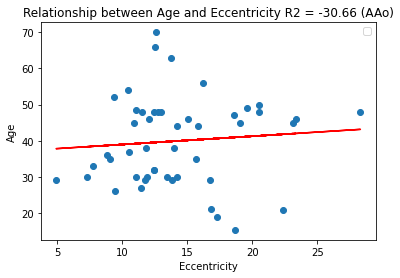

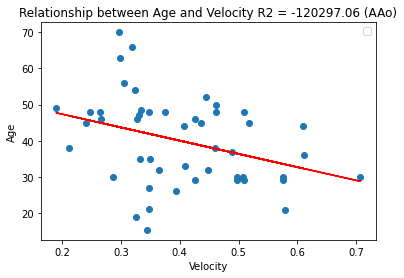

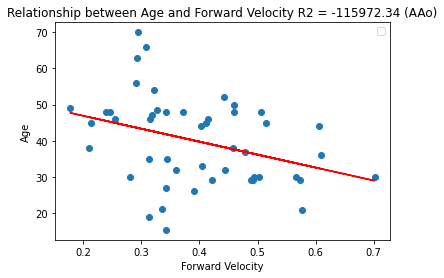

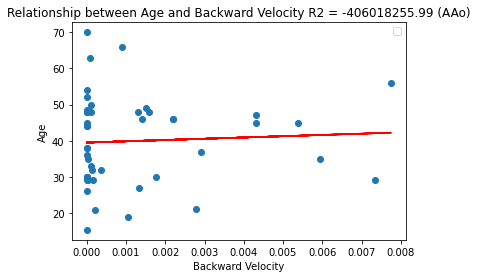

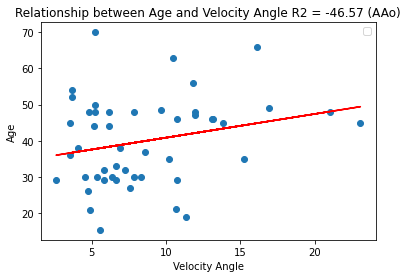

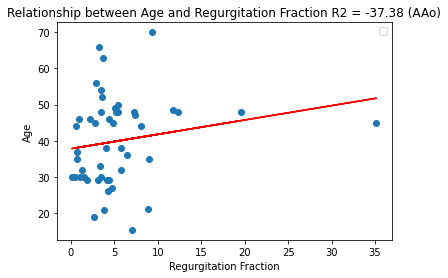

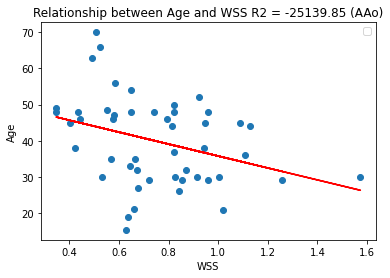

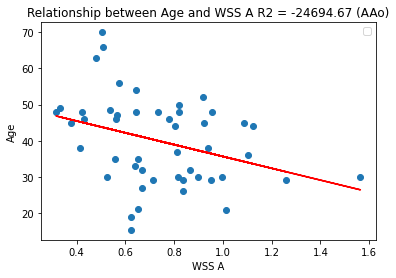

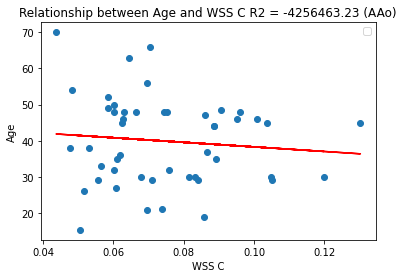

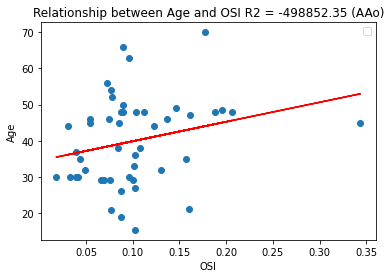

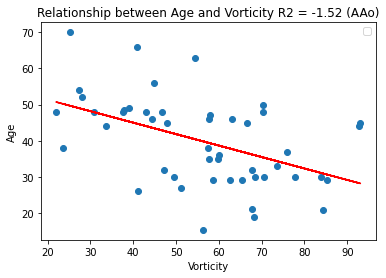

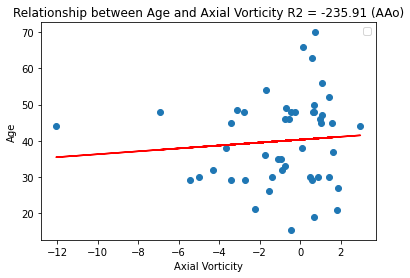

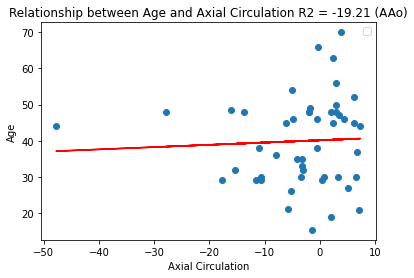

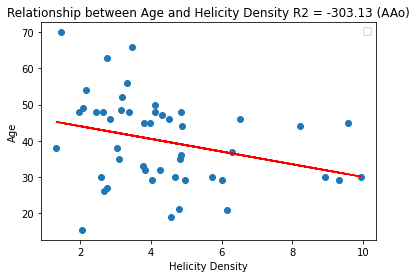

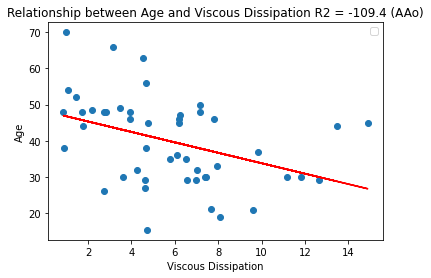

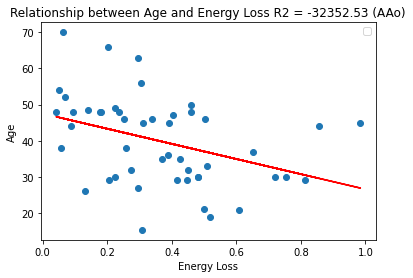

In [181]:
from sklearn.metrics import r2_score
c = 0
for hp in HP_list:
  count = 0
  for data_frames in Hemodynamic_Parameters:
    if c == 0:
      linear_regressor.fit(data_frames, Y)
      Y_pred = linear_regressor.predict(data_frames)
      R2 = round(r2_score(data_frames, Y_pred),2)
      mse = mean_squared_error(Y, Y_pred)
      rmse = round(np.sqrt(mse),4)
      plt.legend([f"{r2_score}"])
      plt.scatter(data_frames, Y)
      plt.plot(data_frames, Y_pred, color='red')
      plt.title(f"Relationship between Age and {names[count]} R2 = {R2} ({sheets[c]})")
      plt.ylabel('Age')
      plt.xlabel(f'{names[count]}')
      plt.show()
      count += 1
      print(" ")
  c += 1

In [183]:
sheets = ["AAo", "AArch", "pDAo", "dDAo"]
dfP = pd.ExcelFile('All_Data.xlsx')
for sheet in sheets:
  df = pd.read_excel(dfP, sheet)
  X = df.iloc[0:, 1:-1]
  Y = df.iloc[0:,-1].values
print(X)
print(Y)

     Eccentricity  Velocity  Forward Velocity  Backward Velocity  \
0        18.71060  0.344410          0.342078           0.000012   
1        11.09860  0.334504          0.326817           0.000009   
2        22.35940  0.579080          0.575983           0.000205   
3         4.93256  0.575249          0.573579           0.000000   
4        12.78190  0.347472          0.343187           0.000008   
..            ...       ...               ...                ...   
117      13.76930  0.330666          0.324824           0.000031   
118      11.39600  0.349701          0.343605           0.000030   
119      18.00760  0.301305          0.286856           0.002622   
120      10.45200  0.246223          0.232758           0.000674   
121      10.33850  0.237447          0.226977           0.000044   

     Velocity Angle  Regurgitation Fraction       WSS     WSS A     WSS C  \
0           5.57570                 7.01206  0.626712  0.622099  0.050431   
1           9.64878          

In [184]:
# with sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 54.44055821735968
Coefficients: 
 [-3.71152171e-01  1.44460292e+03 -1.42455291e+03 -1.81428288e+03
 -9.93508469e-01 -6.32093930e-01  3.31949527e+02 -3.42039964e+02
  2.52569739e+01  3.13145255e+01  2.53720732e-02  9.87425396e-01
 -1.04274203e-01  9.61998377e-01 -7.97813158e+00  7.75919583e+01]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2.258
Date:                Wed, 07 Sep 2022   Prob (F-statistic):            0.00730
Time:                        07:38:31   Log-Likelihood:                -480.03
No. Observations:                 122   AIC:                             994.1
Df Residuals:                     105   BIC:                             1042.
Df Model:                          16                       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


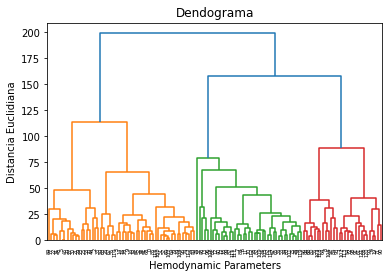

In [185]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Hemodynamic Parameters')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [186]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

In [188]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Hemodynamic Parameters')
plt.ylabel('')
plt.legend()
plt.show()

TypeError: ignored